<h1 align="center">Proyecto "Drunk"</h1>

<h2 align="center">Trabajo académico: Speech recognition</h2>
<h3 align="center">Javier Muinelo Monteagudo e Iria Durán Lusquiños</h3>
<h3 align="center">Equipo: 3</h3>

## Índice
0. ### [Librerías](#librerias)
1. ### [Carga de los datos](#carga)
1. ### [Preprocesamiento](#preproceso)
1. ### [Entrenamiento](#extraccion)
31. ### [Modelos clasicos](#clas)
32. ### [redes neuronales ](#sel)
33. ### [combinacion de modelos](#mod1)
1. ### [resultados](#mod2)


<a id='librerias'></a>

# 0. Librerías

In [1]:
#carga de los datos
import pandas as pd
from sklearn.pipeline import Pipeline
import re 

#regresion logistica
from sklearn.linear_model import LogisticRegression

#svm
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

#naive de bayes 
from sklearn import naive_bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB 

#perceptron multicapa
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


#arbol de decision
from sklearn import tree

#Combinacion de modelos
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

#red neuronal
import tensorflow as tf                               # tensorflow library provides functions for deep neural networks 
from tensorflow.keras.datasets import fashion_mnist   # to load the fashion mnist data set
import matplotlib.pyplot as plt                       # provides functios to visualize data
import numpy as np                                    # provides functions for matrix computations
from sklearn.metrics import classification_report     # function for computing classification metrics 
from numpy.random import seed                         # for reproducibility 
seed(1)
tf.random.set_seed(1)
# ignorar warnings
#import warnings
#warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


#red neuronal
import numpy as np                  # library for numerical computations (vectors, matrices, tensors)
import matplotlib.pyplot as plt     # library providing tools for plotting data 
import tensorflow as tf             # end-to-end open source platform for deep learning
from tensorflow import keras        # library providing methods for defining and training ANN 
from tensorflow.keras import layers 

from sklearn.metrics import confusion_matrix 

# Configuración warnings
# ==============================================================================
import warnings

<a id='carga'></a>

# 1. Cargar de los datos (caracteristicas de los audios)


y dividirlos en train y test 

In [2]:
labels = pd.read_csv("labels.csv")
sample = pd.read_csv("final.csv")

In [3]:
def name_labels (string):
    return re.sub ("_annot.json","",string)
         
def name_sample (string):
    return re.sub (".wav.csv","",string)

<a id='preproceso'></a>

# 2. Preprocesamiento

In [4]:
#eliminamos columnas inutiles
sample1 = sample.iloc[:,1:4370] 
labels1= labels.iloc[:,1:]
#renombramos columnas
sample1["name"] = sample1["name"].apply(name_sample)

labels1.columns = ["name","class"]
labels1["name"] = labels1["name"].apply(name_labels)

#eliminammos aquellas muestras sin clasifica
labels2 = labels1[labels1["class"] != "-1"]
labels2['class'] = labels2['class'].replace("cna", 'a')

#concatenamos
dataframe = labels2.merge(sample1)

#dividimos en x e y 
x= dataframe.iloc[:,2:4370]
y=dataframe.iloc[:,1] 


#split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2)

#estandarizamos 
x_std = StandardScaler().fit_transform(x_train)
x_std_test = StandardScaler().fit_transform(x_test)


#pca
pca = PCA(n_components = 1500)
x_train_pca = pca.fit_transform(x_std)
x_test_pca = pca.transform(x_std_test)


#para red neuronal no puede ser y calificativo

y_train_RN = y_train.copy()
y_train_RN = y_train_RN.replace("a", 1)
y_train_RN =y_train_RN.replace("na", 0)

y_test_RN = y_test.copy()
y_test_RN = y_test_RN.replace("a", 1)
y_test_RN =y_test_RN.replace("na", 0)

#convertimos en array para entrenar
x_train_RN=np.asarray(x_train_pca).astype(np.float)
y_train_RN=np.asarray(y_train_RN).astype(np.int)



<ipython-input-4-82361a921365>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels2['class'] = labels2['class'].replace("cna", 'a')


In [42]:
dataframe.shape

(15180, 4370)

<a id='class'></a>
# 3. Clasificación

In [5]:


def plot_confusion_matrix(cm,f1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a Nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    

    if cmap is None:
        cmap = plt.get_cmap('YlOrBr')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    if f1 == None : 
        plt.xlabel('Predicted label\naccuracy={:0.4f}'.format(accuracy))
    else:
        plt.xlabel('Predicted label\naccuracy={:0.4f}; f1={:0.4f}'.format(accuracy, f1))
    plt.show()

<a id='sel'></a>
## 3.1 Modelos clasicos 
Para la selección de modelos, se tuvieron en cuenta los siguientes modelos implementados a partir de la librería sklearn :
- SVM
- Regresión Logistica
- Árboles de decisión
- Perceptrón multicapa


Por otro lado, se ha utilizado la técnica de validación cruzada para evaluar los resultados obtenidos por cada modelo. Dicha técnica consiste en dividir el dataset train en  subconjuntos de entrenamiento y validación lo que nos permite calcular una probabilidad de ser o no sexista y por tanto una clasificación en dichos grupos  más ajustada a la realidad. En esta etapa se ha decidido limitar el k-fold a 10. Es importante mencionar que los resultados obtenidos  pueden variar en cada ejecución debido a la semilla utilizada en esta técnica.  No obstante, los resultados son similares en cada vez.  Por otro lado, destacar que somos conocedores de la posibilidad de realizar dicha técnica dentro de la función **GridSearchCV** más no nos permite seleccionar el modelo en función de dos métricas por lo que decidimos entrenar el modelo teniendo en cuenta el mejor acuracy y luego calcular con una validación cruzada para obtener el F1 de cada modelo. 


In [6]:
#este es el predefinido 
k = 10
kf = model_selection.KFold(n_splits = k, random_state = None)

### 3.1.1 SVM

En cuanto a las métricas utilizadas para evaluar el modelo se han seleccionado, dado que estas son las que se van a tener en cuenta en la competición ,la accurancy y el F1 siendo estos:
- Accurancy: precisión del modelo entrenado, es decir, porcentaje de textos bien clasificados. 
- F1: promedio ponderado de la precisión y la recuperación, donde una puntuación alcanza su mejor valor en 1 y la peor puntuación en 0.

El modelo de **máquinas de vectores soporte (SVM)** construye un hiperplano en un espacio multidimensional para separar diferentes clases y genera un hiperplano óptimo de manera iterativa  que maximiza la division de las clases de la base de datos y por lo tanto minimiza los errores .

Destacar el hecho de que el presente modelo permite la definción de desbalanceo de clases (`class_weight = 'balanced'`) por lo que no es necesario realizar un analisis previo para solventar dicho problema.

Los parámetros que se han tenido en cuenta para la selección y,  por tanto, se han ido modificando son los siguientes:
   
   - `C` : **float**, default=1.0
     
     Recoge la regularización del modelo, es decir, controla cuánto error es soportable en la optimización lo que permite reducir el sobreajuste. Cuanto más grande es el valor de C más grande es el margen del hiperplano. 
     
    
   - `kernel`: **{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}**, default='rbf'
    
     Especifica el tipo de núcleo que se utilizará en el algoritmo. Debe ser uno de los siguientes: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'. Si no se indica ninguno, se utilizará "rbf".
     
     
   - `gamma`: **{'scale', 'auto'}** o float, default='scale'.
    
     Coeficiente del núcleo para 'rbf', 'poly' y 'sigmoid'


In [7]:
""""
modelsvm = svm.SVC(class_weight = 'balanced', gamma = 'scale',kernel= 'linear')
modelsvm.fit(x_train1, y_train1)
""""

SyntaxError: EOL while scanning string literal (<ipython-input-7-a802c8f83e02>, line 4)

In [ ]:
""""modelsvm = GridSearchCV(estimator=svm.SVC(class_weight = 'balanced', gamma = 'scale'), param_grid={'C': [0.5,0.75,1], 'kernel': ('linear','sigmoid', 'rbf')})
modelsvm.fit(x_train1, y_train1)""""

Mejores parametros

Resultados

In [ ]:
"""pred = clf.predict(X_test)

score = accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)

f1 = f1_score(y_test, pred, average='weighted')
print("      F1:   %0.3f" % f1)"""

### 3.1.2 Regresión Logistica

La **regresión logísta** es un modelo para clasificación que aprende una relación lineal del conjunto de datos dado y luego introduce una no linealidad con la función logística.

Como sucedía en el caso anterior, permite definir que las clases de la base de datos se encuentran  desbalanceadas  (`class_weight = 'balanced'`) por lo que no es necesario realizar un analisis previo para solventar dicho problema.

Los parámetros que consideramos más importantes y por tanto vamos a probar son:
    
   - `C` : **float**, default=1.0
 
     Inverso de la fuerza de regularización; debe ser un número positivo. Como en las máquinas de vectores de apoyo, los valores más pequeños especifican una regularización más fuerte.
     
     
   - `solver`: **{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}**, default='lbfgs'
    
      Algoritmo a utilizar en el problema de optimización.
      
      
   - `max_iter`: **int**, default=100
   
      Número máximo de iteraciones que tardan los solucionadores en converger.

In [8]:
#modelrl = GridSearchCV(estimator=LogisticRegression(multi_class  ='ovr'), param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'max_iter' : [100, 200, 300]}, cv=kf)
modelrl = LogisticRegression(multi_class  = 'ovr', C = 0.4, max_iter = 100, solver = 'liblinear')
modelrl.fit(x_train_pca, y_train)


LogisticRegression(C=0.4, multi_class='ovr', solver='liblinear')

Mejores parametros

In [9]:
#print("La mejor combinación de parámetros probados para el modelo es {} " .format(modelrl.best_params_))

Resultados

In [10]:
pred_rl = modelrl.predict(x_test_pca)

score_rl = accuracy_score(y_test, pred_rl)
print("Accuracy:   %0.3f" % score_rl)

f1_rl = f1_score(y_test, pred_rl, average='weighted')
print("      F1:   %0.3f" % f1_rl)

Accuracy:   0.732
      F1:   0.728


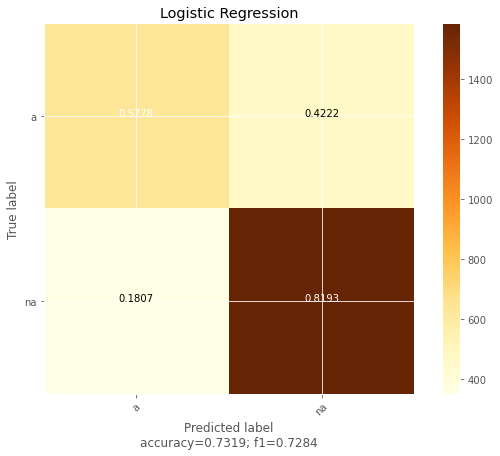

In [34]:
cm_rl =confusion_matrix (y_test, pred_rl, labels=["a", "na"])
plot_confusion_matrix(cm_rl,f1_rl,
                          ["a","na"],
                          title='Logistic Regression',
                          cmap=None,
                          normalize=True)

## 3.1.3 Perceptrón multicapa

El **perceptrón multicapa** es una red neuronal artificial (RNA) formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables.

Se utilizan redes neuronales formadas por capas de neuronas.

La capa de entrada está formada por los valores que toman las características con las que se va a
alimentar la red. Es decir, en esta capa no se va a aplicar ninguna función a los datos.

Los parámetros de este modelo que vamos a probar son:
   - `random_state`. Tipo entero. Por defecto=None
      
      Determina la generación de números aleatorios para la inicialización de los pesos y el sesgo, la división de entrenamiento-prueba si se utiliza la parada temprana y el muestreo por lotes cuando el solver='sgd' o 'adam'. Pase un int para que los resultados sean reproducibles a través de múltiples llamadas a la función.
      
      
   - `max_iter`: Tipo entero. Por defecto = 200
      
      Número máximo de iteraciones. El solucionador itera hasta la convergencia (determinada por 'tol') o este número de iteraciones. Para los solucionadores estocásticos ('sgd', 'adam'), tenga en cuenta que esto determina el número de épocas (cuántas veces se utilizará cada punto de datos), no el número de pasos de gradiente.
      
      
   - `activation`{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}. Por defecto = ’relu’
       
       Función de activación para la capa oculta.
      
      - 'identity', activación no-op, útil para implementar el cuello de botella lineal, devuelve f(x) = x
    
      - 'logistic', la función sigmoidea logística, devuelve f(x) = 1 / (1 + exp(-x)).

      - 'tanh', la función hiperbólica tan, devuelve f(x) = tanh(x).

      - 'relu', la función lineal unitaria rectificada, devuelve f(x) = max(0, x).
      
   
   - `solver`{‘lbfgs’, ‘sgd’, ‘adam’}. Por defecto = ’adam’
   
       El solucionador para la optimización del peso.
       
      - 'lbfgs' es un optimizador de la familia de los métodos quasi-Newton. 63

      - 'sgd' se refiere al descenso de gradiente estocástico.

      - 'adam' se refiere a un optimizador basado en el gradiente estocástico propuesto por Kingma, Diederik y Jimmy Ba.
      
       'adam' funciona bastante bien en conjuntos de datos relativamente grandes (con miles de muestras de entrenamiento o más) en términos de tiempo de entrenamiento y puntuación de validación. Sin embargo, para conjuntos de datos pequeños, 'lbfgs' puede converger más rápido y funcionar mejor.

### Adam

In [12]:
#modelpmAdam = GridSearchCV(estimator = MLPClassifier(random_state = 1, solver = 'adam'), param_grid={'activation':('identity', 'logistic', 'tanh', 'relu'), 'max_iter': [ 100,1000,10000] }, cv =kf) 
modelpmAdam = MLPClassifier( solver = 'adam', activation = "logistic",max_iter = 100,random_state = 1)
modelpmAdam.fit(x_train_pca, y_train)




MLPClassifier(activation='logistic', max_iter=100, random_state=1)

In [13]:
#print("La mejor combinación de parámetros probados para el modelo es {} junto a los ya fijados" .format(modelpmAdam.best_params_))

pred_Adam = modelpmAdam.predict(x_test_pca)

score_Adam = accuracy_score(y_test, pred_Adam)
print("Accuracy:   %0.3f" % score_Adam)

f1_Adam = f1_score(y_test, pred_Adam, average='weighted')
print("      F1:   %0.3f" % f1_Adam)

Accuracy:   0.745
      F1:   0.742


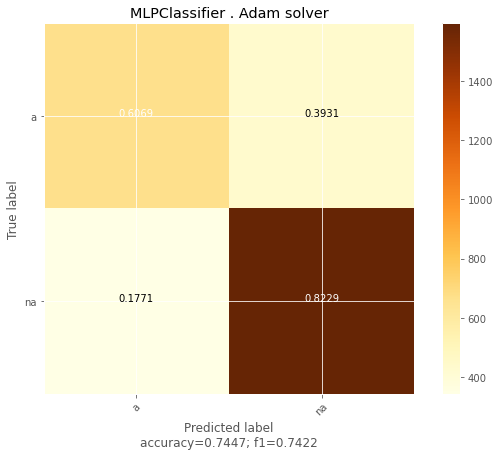

In [14]:
cm_Adam =confusion_matrix (y_test, pred_Adam)
plot_confusion_matrix(cm_Adam,f1_Adam,
                          ["a","na"],
                          title='MLPClassifier . Adam solver',
                          cmap=None,
                          normalize=True)

### SGD

In [15]:
#modelpm_SGD = GridSearchCV(estimator = MLPClassifier(random_state = 1, solver =  'sgd'), param_grid={'activation':('identity', 'logistic', 'tanh', 'relu'), 'max_iter': [ 100,1000,10000] }, cv =kf) 
#modelpm = MLPClassifier( solver = 'sgd', activation = "logistic",max_iter = 100,random_state = 105)
modelpm_SGD = MLPClassifier( solver = 'sgd', activation = "logistic",max_iter = 100,random_state = 1)
modelpm_SGD.fit(x_train_pca, y_train)



/Users/iriaduran/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=100, random_state=1, solver='sgd')

In [16]:
#print("La mejor combinación de parámetros probados para el modelo es {} junto a los ya fijados" .format(modelpm_SGD.best_params_))

pred_SGD = modelpm_SGD.predict(x_test_pca)

score_SGD = accuracy_score(y_test, pred_SGD)
print("Accuracy:   %0.3f" % score_SGD)

f1_SGD = f1_score(y_test, pred_SGD, average='weighted')
print("      F1:   %0.3f" % f1_SGD)

Accuracy:   0.750
      F1:   0.745


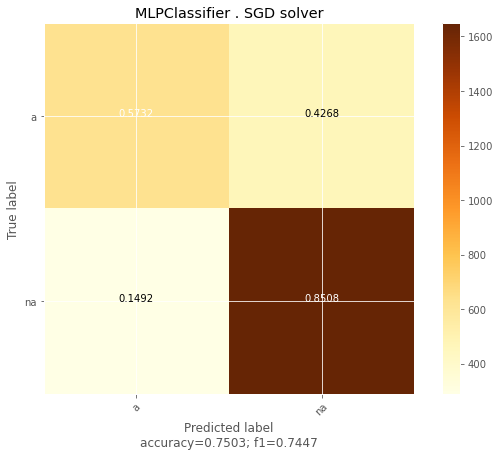

In [17]:
cm_SGD =confusion_matrix (y_test, pred_SGD)
plot_confusion_matrix(cm_SGD,f1_SGD,
                          ["a","na"],
                          title='MLPClassifier . SGD solver',
                          cmap=None,
                          normalize=True)

## Arboles de decision

In [18]:
#modeltree = GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid={'max_depth': [2, 5, 10, 15, 20], 'min_samples_leaf': [5, 4, 3, 2, 1]},cv = kf) 
modeltree = tree.DecisionTreeClassifier( max_depth = 5, min_samples_leaf = 4)
modeltree.fit(x_train_pca, y_train)




DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [19]:
#print("La mejor combinación de parámetros probados para el modelo es {} junto a los ya fijados" .format(modeltree.best_params_))

pred_tree = modeltree.predict(x_test_pca)

score_tree = accuracy_score(y_test, pred_tree)
print("Accuracy:   %0.3f" % score_tree)

f1_tree = f1_score(y_test, pred_tree, average='weighted')
print("      F1:   %0.3f" % f1_tree)

Accuracy:   0.636
      F1:   0.595


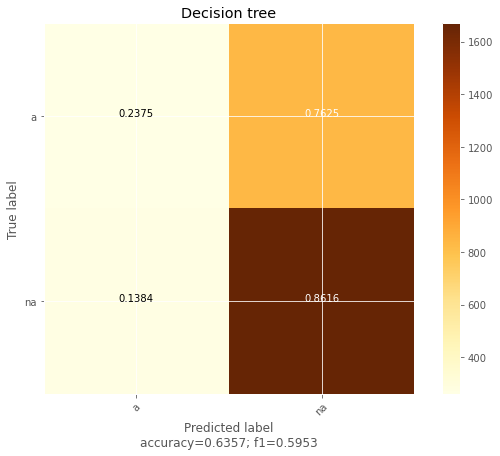

In [20]:
cm_tree =confusion_matrix (y_test, pred_tree)
plot_confusion_matrix(cm_tree,f1_tree,
                          ["a","na"],
                          title='Decision tree',
                          cmap=None,
                          normalize=True)

<a id='sel'></a>
## 3.2  bagging



### logistic

In [21]:
modelBaggingRL = BaggingClassifier(base_estimator=LogisticRegression( multi_class  = 'ovr', C = 0.4, max_iter = 100, solver = 'liblinear'), n_estimators=10)

modelBaggingRL.fit(x_train_pca, y_train)



BaggingClassifier(base_estimator=LogisticRegression(C=0.4, multi_class='ovr',
                                                    solver='liblinear'))

In [22]:
pred_bag_RL = modelBaggingRL.predict(x_test_pca)

score_bag_RL = accuracy_score(y_test, pred_bag_RL)
print("Accuracy:   %0.3f" % score_bag_RL)

f1_bag_RL = f1_score(y_test, pred_bag_RL, average='weighted')
print("      F1:   %0.3f" % f1_bag_RL)

Accuracy:   0.730
      F1:   0.727


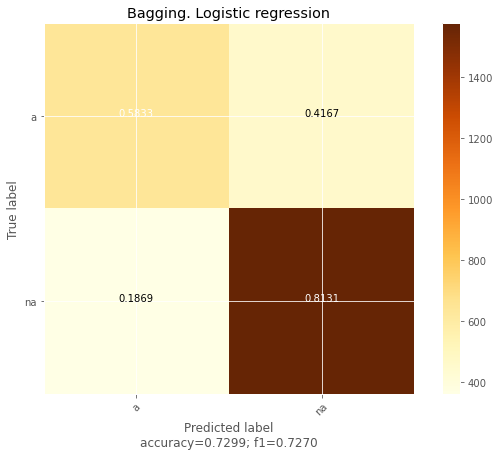

In [23]:
cm_bag_RL =confusion_matrix (y_test, pred_bag_RL)
plot_confusion_matrix(cm_bag_RL,f1_bag_RL,
                          ["a","na"],
                          title='Bagging. Logistic regression',
                          cmap=None,
                          normalize=True)

### decision tree

In [24]:
modelBaggingDT = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1,), n_estimators=10)

modelBaggingDT.fit(x_train_pca, y_train)



BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

In [25]:
pred_bag_DT = modelBaggingRL.predict(x_test_pca)

score_bag_DT = accuracy_score(y_test, pred_bag_DT)
print("Accuracy:   %0.3f" % score_bag_DT)

f1_bag_DT = f1_score(y_test, pred_bag_DT, average='weighted')
print("      F1:   %0.3f" % f1_bag_DT)

Accuracy:   0.730
      F1:   0.727


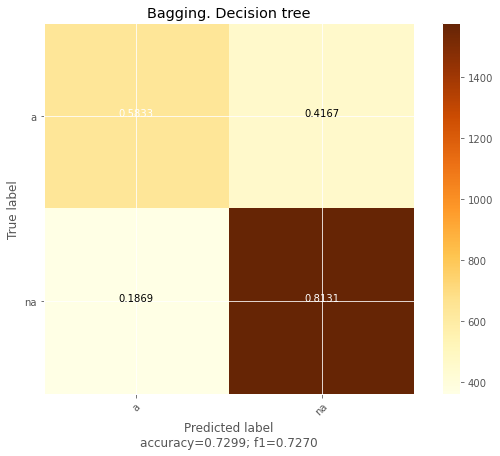

In [26]:
cm_bag_DT =confusion_matrix (y_test, pred_bag_DT)
plot_confusion_matrix(cm_bag_DT,f1_bag_DT,
                          ["a","na"],
                          title='Bagging. Decision tree',
                          cmap=None,
                          normalize=True)

### svm

In [ ]:
"""
modelBaggingsvm = BaggingClassifier(base_estimator=svm.SVC( kernel= 'linear'), n_estimators=10)
modelBaggingsvm.fit(x_train_pca, y_train)"""

In [ ]:
"""pred_bag_SVM = modelBaggingsvm.predict(x_test_pca)

score_bag_SVM = accuracy_score(y_test, pred_bag_SVM)
print("Accuracy:   %0.3f" % score)

f1_bag_SVM = f1_score(y_test, pred_bag_SVM, average='weighted')
print("      F1:   %0.3f" % f1)"""

<a id='sel'></a>
## 3.3  Adaboost


### regresion 

In [27]:

modelAdaBoostRL = AdaBoostClassifier( base_estimator = LogisticRegression(multi_class  = 'ovr', C = 0.4, max_iter = 100, solver = 'liblinear'), n_estimators=100)

modelAdaBoostRL.fit(x_train_pca, y_train)




AdaBoostClassifier(base_estimator=LogisticRegression(C=0.4, multi_class='ovr',
                                                     solver='liblinear'),
                   n_estimators=100)

In [28]:
pred_ada_RL = modelAdaBoostRL.predict(x_test_pca)

score_ada_RL = accuracy_score(y_test, pred_ada_RL)
print("Accuracy:   %0.3f" % score_ada_RL)

f1_ada_RL = f1_score(y_test, pred_ada_RL, average='weighted')
print("      F1:   %0.3f" % f1_ada_RL)

Accuracy:   0.730
      F1:   0.726


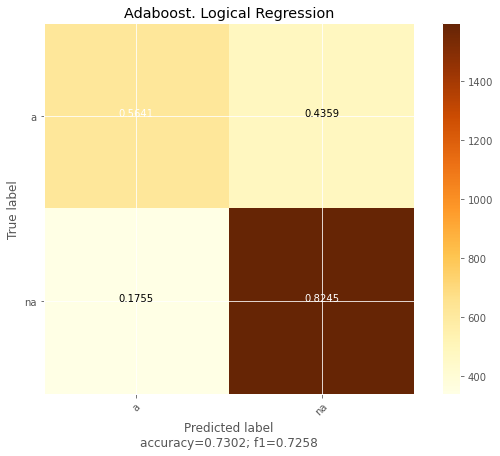

In [29]:
cm_ada_RL  =confusion_matrix (y_test, pred_ada_RL )
plot_confusion_matrix(cm_ada_RL ,f1_ada_RL ,
                          ["a","na"],
                          title='Adaboost. Logical Regression',
                          cmap=None,
                          normalize=True)

### Decision tree

In [30]:
modelAdaBoostAD = AdaBoostClassifier( base_estimator = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 4,), n_estimators=100)

modelAdaBoostAD.fit(x_train_pca, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_samples_leaf=4),
                   n_estimators=100)

In [31]:
pred_ada_AD = modelAdaBoostAD.predict(x_test_pca)

score_ada_AD = accuracy_score(y_test, pred_ada_AD)
print("Accuracy:   %0.3f" % score_ada_AD)

f1_ada_AD = f1_score(y_test, pred_ada_AD, average='weighted')
print("      F1:   %0.3f" % f1_ada_AD)

Accuracy:   0.641
      F1:   0.632


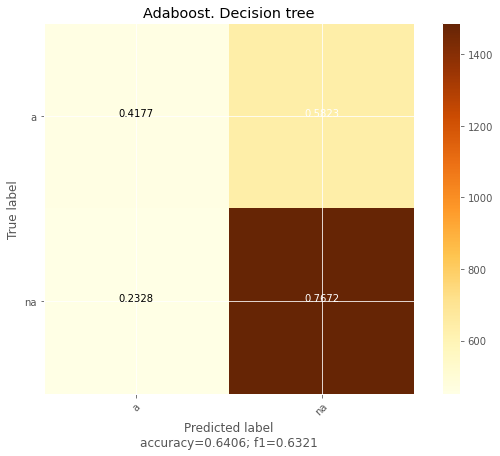

In [32]:
cm_ada_AD =confusion_matrix (y_test, pred_ada_AD)
plot_confusion_matrix(cm_ada_AD,f1_ada_AD,
                          ["a","na"],
                          title='Adaboost. Decision tree',
                          cmap=None,
                          normalize=True)

## Red neuronal

In [37]:
model = keras.Sequential([
    
    # hidden layers
    layers.Dense(1500, activation='relu',input_shape=(12144,1500)),
    
    layers.Dense(500, activation='relu',input_shape=(12144,1500)),
    
     layers.Dense(100, activation='relu',input_shape=(12144,1500)),
    # output layer
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['sparse_categorical_accuracy'])


    
history = model.fit(x_train_pca, y_train_RN,
                            validation_split = 0.2,batch_size = 32,
                            epochs=20)
model.save('model_redNeuronal.h5')
    


Epoch 1/20
304/304 [==============================] - 11s 31ms/step - loss: 0.6183 - sparse_categorical_accuracy: 0.6423 - val_loss: 0.5194 - val_sparse_categorical_accuracy: 0.6352
Epoch 2/20
304/304 [==============================] - 7s 23ms/step - loss: 0.4075 - sparse_categorical_accuracy: 0.6423 - val_loss: 0.5528 - val_sparse_categorical_accuracy: 0.6352
Epoch 3/20
304/304 [==============================] - 7s 25ms/step - loss: 0.2625 - sparse_categorical_accuracy: 0.6423 - val_loss: 0.8101 - val_sparse_categorical_accuracy: 0.6352
Epoch 4/20
304/304 [==============================] - 8s 27ms/step - loss: 0.1715 - sparse_categorical_accuracy: 0.6423 - val_loss: 0.9239 - val_sparse_categorical_accuracy: 0.6352
Epoch 5/20
304/304 [==============================] - 8s 26ms/step - loss: 0.1181 - sparse_categorical_accuracy: 0.6423 - val_loss: 1.5769 - val_sparse_categorical_accuracy: 0.6352
Epoch 6/20
304/304 [==============================] - 8s 25ms/step - loss: 0.0989 - sparse_cat

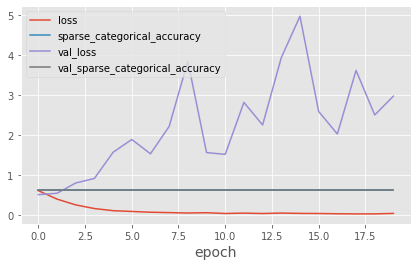

In [38]:
pd.DataFrame(history.history).plot(figsize=(7,4))
plt.grid(True)
plt.xlabel('epoch', fontsize=14)
plt.show()

In [39]:
test_loss, test_accuracy = model.evaluate(x_test_pca, y_test_RN, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

95/95 - 0s - loss: 3.1798 - sparse_categorical_accuracy: 0.6380
Accuracy on test dataset: 0.638010561466217


In [40]:
pred_RN = model.predict(x_test_pca)
preds = list(map(lambda x: 0 if x<0.5 else 1,pred_RN))
preds

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,


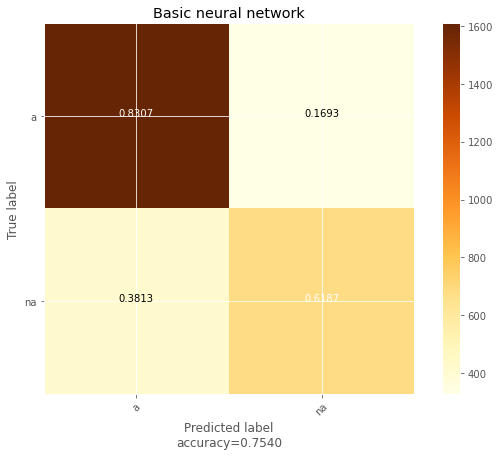

In [41]:
pred_RN = model.predict(x_test_pca)
indexes = tf.argmax(pred_RN, axis=1)
cm_ada_AD =confusion_matrix (y_test_RN, preds)
plot_confusion_matrix(cm_ada_AD,None,
                          ["a","na"],
                          title='Basic neural network',
                          cmap=None,
                          normalize=True)

In [ ]:
output=model.predict(x_test_pca)
indexes = np.argmax(output,axis=1)


In [ ]:
indexes.eval()

In [ ]:


model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['sparse_categorical_accuracy'])


    
history = model.fit(x_train_pca, y_train_RN,
                            validation_split = 0.2,batch_size = 32,
                            epochs=20)

    



<a id='sel'></a>
## 4  ANEXO

### 4.1 PCA

In [ ]:
# Calculamos la matriz de covarianza
print('NumPy covariance matrix: \n%s' %np.cov(x_std.T))
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])
    
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

cum_var_exp = cum_var_exp[0:50]
var_exp= var_exp[0:50]

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(50), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(50), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()